>IMPORTS

In [138]:
# standard data science imports
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

# data prep imports
from sklearn.model_selection import train_test_split
import sklearn.preprocessing

# stats import
from scipy import stats

# modeling imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# model evaluation imports
from sklearn.metrics import \
accuracy_score,\
recall_score,\
precision_score,\
confusion_matrix,\
classification_report

# ignore warning import
import warnings
warnings.filterwarnings("ignore")

# custom modules
import os
import env
import acquire_telco as a
import prepare as p

>ACQUIRE

In [139]:
df = a.get_telco_data()

this file exists, reading csv


>Acquired telco data by using my get_telco_data function from my acquire.py file. This function pulls the telco_churn data from the mySQL Codeup db into a dataframe.

>username, host, and password credentials are needed to pull in the data from mySQL.

In [140]:
df.shape

(7043, 24)

>Dataframe has 7043 rows and 24 columns.

>Each observation represents a different variable of a telco customer.

>Each column represents a different telco customer.

>PREPARE

First I want to look at all my data and see the best way to clean and prepare it to find what is causing churn.

In [141]:
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_support 

In [143]:
# function to view all numeric columns and view the distribution of each variable. 

num_col = df.select_dtypes(include='number').columns
num_col

Index(['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'senior_citizen', 'tenure', 'monthly_charges'],
      dtype='object')

Univariate Stats

payment_type_id
payment_type_id
1    2365
2    1612
3    1544
4    1522
Name: count, dtype: int64
payment_type_id
1    0.335794
2    0.228880
3    0.219225
4    0.216101
Name: proportion, dtype: float64


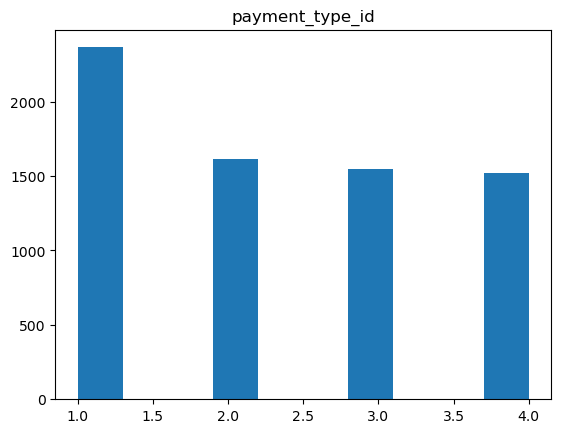

internet_service_type_id
internet_service_type_id
2    3096
1    2421
3    1526
Name: count, dtype: int64
internet_service_type_id
2    0.439585
1    0.343746
3    0.216669
Name: proportion, dtype: float64


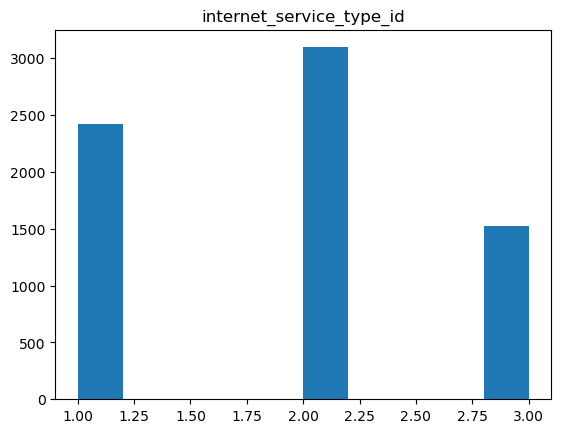

contract_type_id
contract_type_id
1    3875
3    1695
2    1473
Name: count, dtype: int64
contract_type_id
1    0.550192
3    0.240664
2    0.209144
Name: proportion, dtype: float64


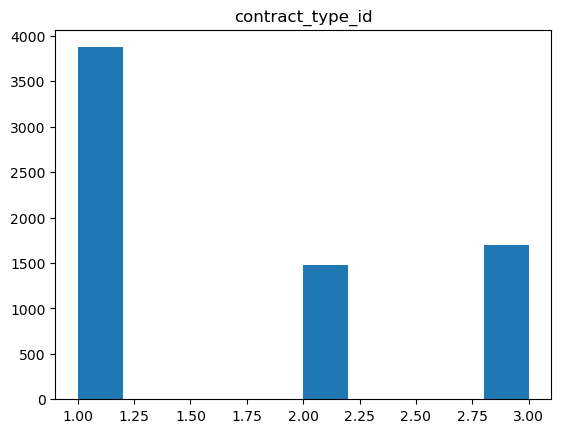

senior_citizen
senior_citizen
0    5901
1    1142
Name: count, dtype: int64
senior_citizen
0    0.837853
1    0.162147
Name: proportion, dtype: float64


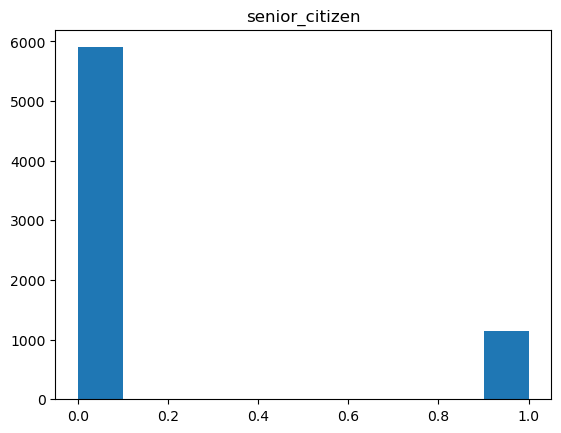

tenure
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
tenure
1     0.087037
72    0.051399
2     0.033792
3     0.028397
4     0.024989
        ...   
28    0.008093
39    0.007951
44    0.007241
36    0.007099
0     0.001562
Name: proportion, Length: 73, dtype: float64


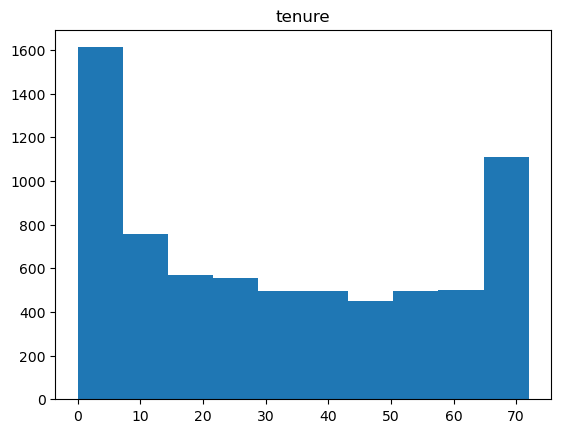

monthly_charges
monthly_charges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
116.55     1
106.85     1
68.55      1
108.80     1
67.85      1
Name: count, Length: 1585, dtype: int64
monthly_charges
20.05     0.008661
19.85     0.006389
19.95     0.006247
19.90     0.006247
20.00     0.006105
            ...   
116.55    0.000142
106.85    0.000142
68.55     0.000142
108.80    0.000142
67.85     0.000142
Name: proportion, Length: 1585, dtype: float64


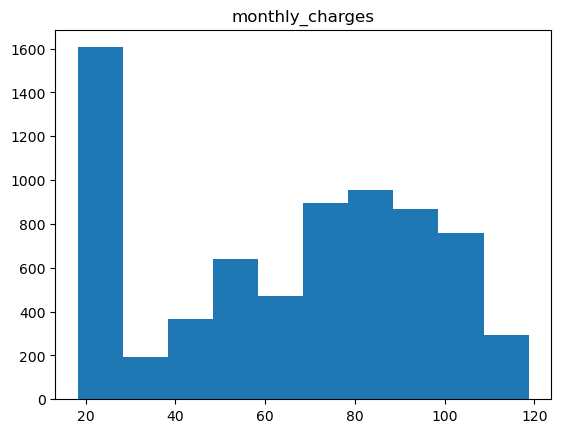

In [144]:
#visualizing my numeric variable's distribution and printing the value counts and percentages.

for col in num_col:
    print(col)
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True)) #percentage
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [145]:
#function to view all non-numeric columns and view the distribution of each variable. 

str_col = df.select_dtypes(exclude='number').columns
str_col

Index(['customer_id', 'gender', 'partner', 'dependents', 'phone_service',
       'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'total_charges', 'churn', 'contract_type',
       'internet_service_type', 'payment_type'],
      dtype='object')

gender
gender
Male      3555
Female    3488
Name: count, dtype: int64
gender
Male      0.504756
Female    0.495244
Name: proportion, dtype: float64


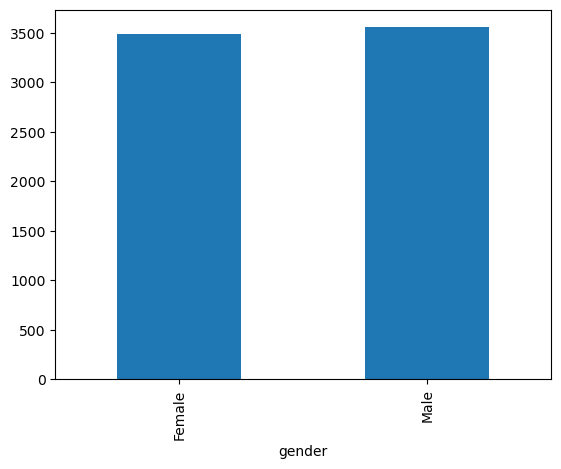


partner
partner
No     3641
Yes    3402
Name: count, dtype: int64
partner
No     0.516967
Yes    0.483033
Name: proportion, dtype: float64


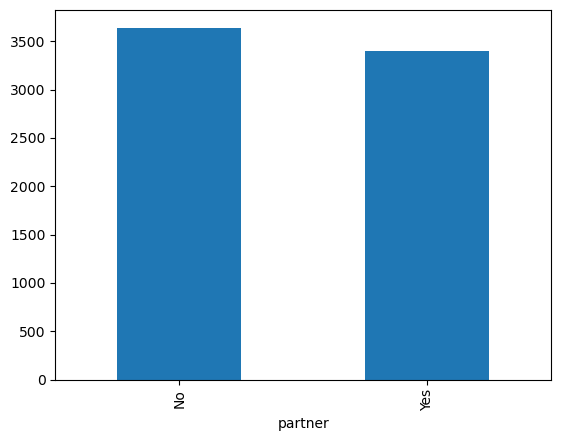


dependents
dependents
No     4933
Yes    2110
Name: count, dtype: int64
dependents
No     0.700412
Yes    0.299588
Name: proportion, dtype: float64


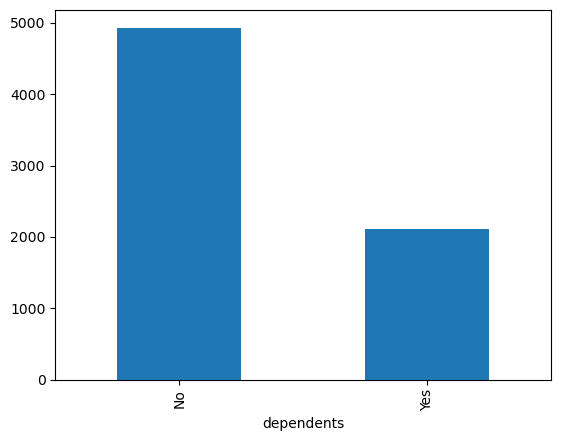


phone_service
phone_service
Yes    6361
No      682
Name: count, dtype: int64
phone_service
Yes    0.903166
No     0.096834
Name: proportion, dtype: float64


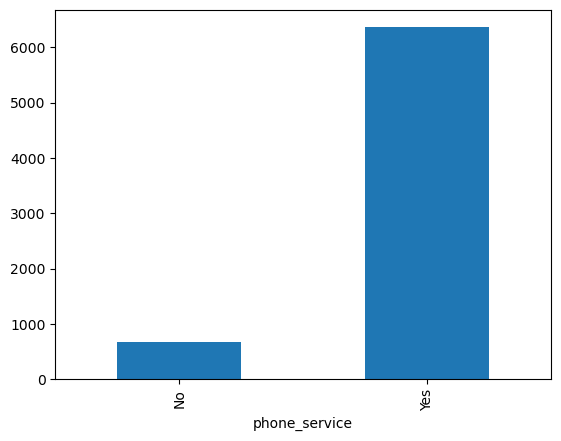


multiple_lines
multiple_lines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
multiple_lines
No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: proportion, dtype: float64


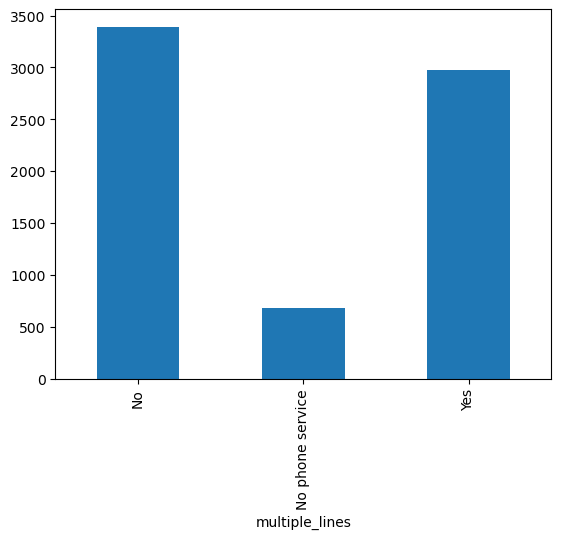


online_security
online_security
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
online_security
No                     0.496663
Yes                    0.286668
No internet service    0.216669
Name: proportion, dtype: float64


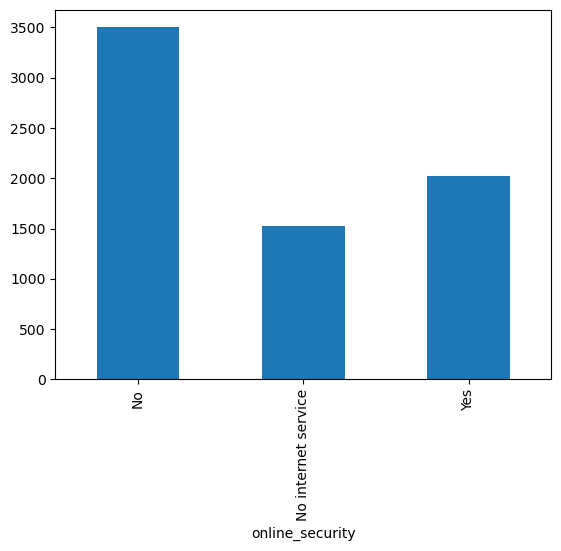


online_backup
online_backup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
online_backup
No                     0.438450
Yes                    0.344881
No internet service    0.216669
Name: proportion, dtype: float64


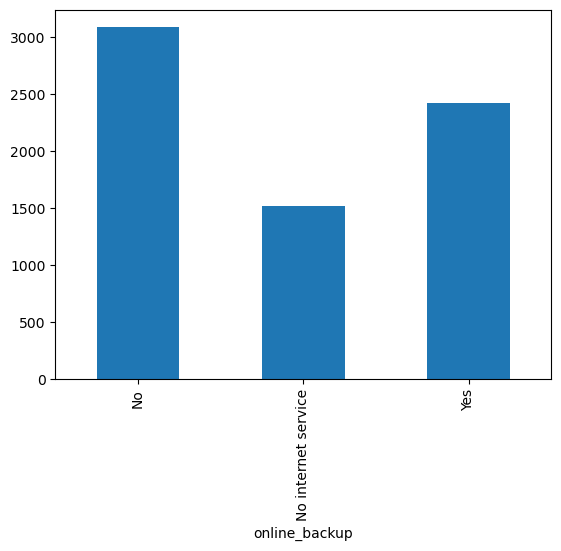


device_protection
device_protection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
device_protection
No                     0.439443
Yes                    0.343888
No internet service    0.216669
Name: proportion, dtype: float64


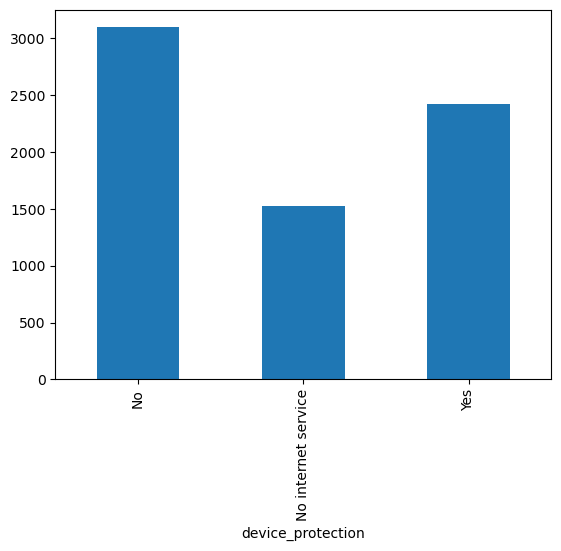


tech_support
tech_support
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64
tech_support
No                     0.493114
Yes                    0.290217
No internet service    0.216669
Name: proportion, dtype: float64


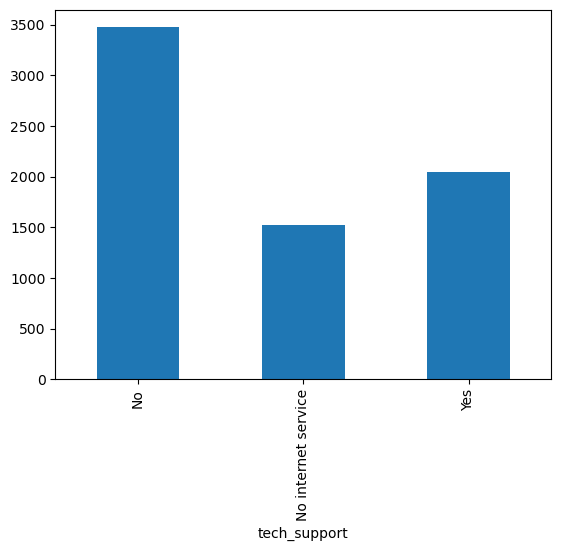


streaming_tv
streaming_tv
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64
streaming_tv
No                     0.398978
Yes                    0.384353
No internet service    0.216669
Name: proportion, dtype: float64


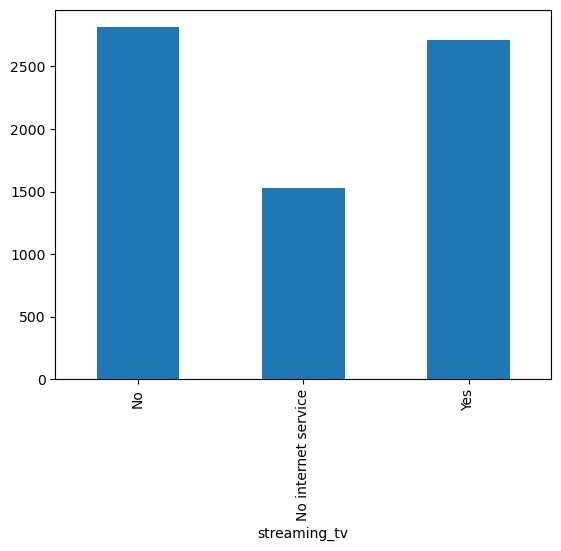


streaming_movies
streaming_movies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64
streaming_movies
No                     0.395428
Yes                    0.387903
No internet service    0.216669
Name: proportion, dtype: float64


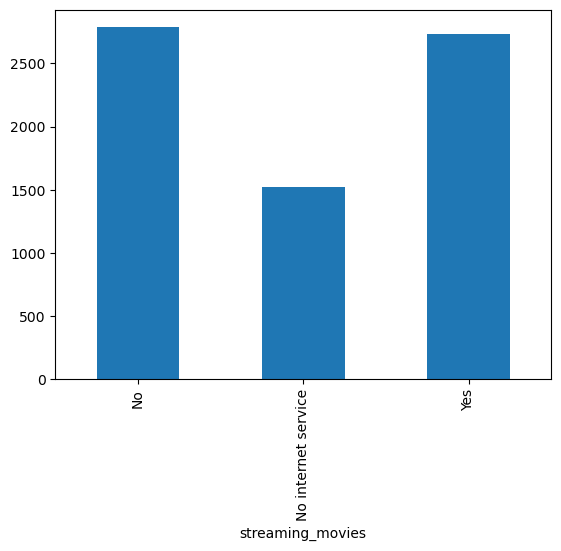


paperless_billing
paperless_billing
Yes    4171
No     2872
Name: count, dtype: int64
paperless_billing
Yes    0.592219
No     0.407781
Name: proportion, dtype: float64


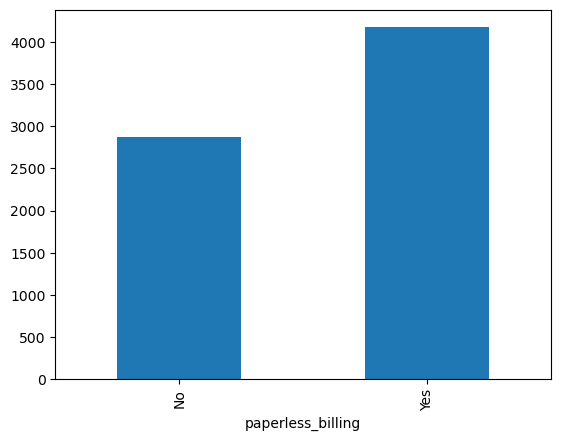


total_charges
total_charges
           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
2387.75     1
6302.8      1
2058.5      1
829.55      1
3707.6      1
Name: count, Length: 6531, dtype: int64
total_charges
           0.001562
20.2       0.001562
19.75      0.001278
19.9       0.001136
20.05      0.001136
             ...   
2387.75    0.000142
6302.8     0.000142
2058.5     0.000142
829.55     0.000142
3707.6     0.000142
Name: proportion, Length: 6531, dtype: float64


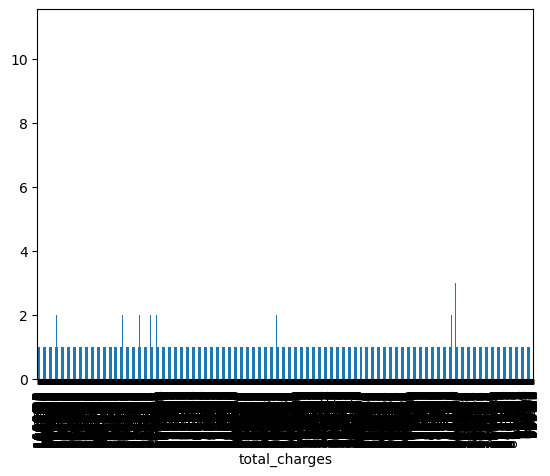


churn
churn
No     5174
Yes    1869
Name: count, dtype: int64
churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


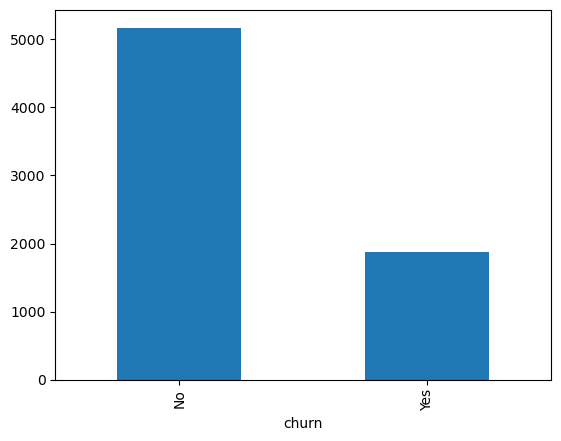


contract_type
contract_type
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64
contract_type
Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: proportion, dtype: float64


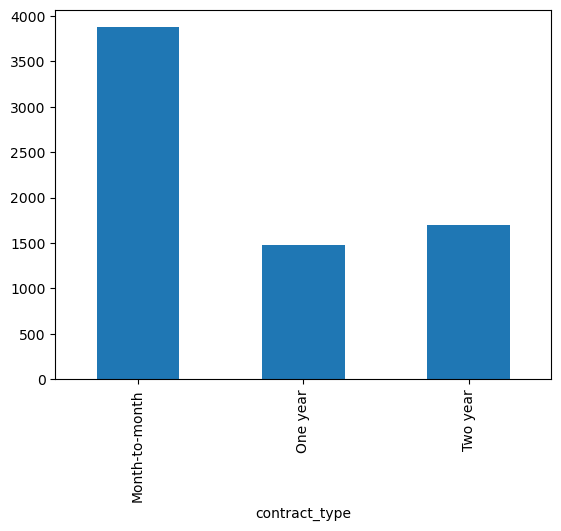


internet_service_type
internet_service_type
Fiber optic    3096
DSL            2421
Name: count, dtype: int64
internet_service_type
Fiber optic    0.561175
DSL            0.438825
Name: proportion, dtype: float64


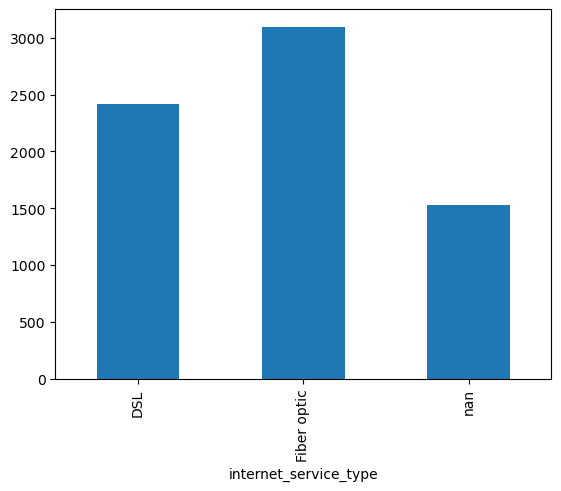


payment_type
payment_type
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64
payment_type
Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Name: proportion, dtype: float64


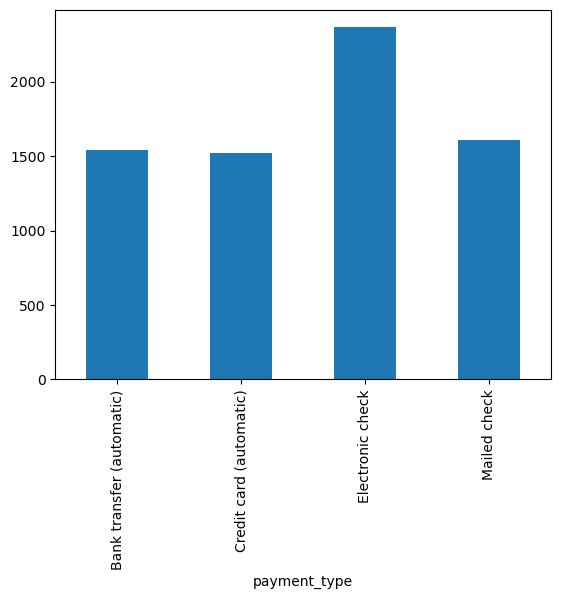

In [146]:
#visualizing my numeric variable's distribution and printing the value counts and percentages.

for col in str_col[1:]:
    print(col)
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True)) #percentage
    df[col].value_counts(dropna=False).sort_index().plot.bar()
    plt.show()
    print()

In [147]:
#created prep_telco function to clean data and prepare for modeling.

def prep_telco(df):
    '''
    function will do necessary cleaning specifically for the database 'telco_churn'.
    It will:
    - drop unnecessary columns
    - fill in null values where needed. 
    - encode and rename most categorical columns.
    return: concatenated and cleaned dataframe 'telco_churn' as 'df'
    '''    
    #change total charges to dtype float
    df['total_charges'] = df.total_charges.str.replace(' ', '0').astype(float)
    
    #drop duplicate or unnecessary columns
    df = df.drop(columns=['contract_type_id', 'payment_type_id', 'internet_service_type_id'])

    #fill in null values
    df['internet_service_type'] = df['internet_service_type'].fillna(value='No Internet Service')
    
    #change payment type to payment types which will group automatic or manual payment types as variables.
    df['payment_types'] = df['payment_type'].apply(lambda x: 'Manual' if x in ['Electronic check', 'Mailed check'] else 'Automatic')
    df = df.drop(columns=['payment_type'])
    
    #encode binary columns for modeling
    df['gender_encoded'] = df.gender.map({'Female': 1, 'Male':0})
    df['partner_encoded'] = df.partner.map({'Yes':1, 'No':0})
    df['dependents_encoded'] = df.dependents.map({'Yes':1, 'No':0})
    df['phone_service_encoded'] = df.phone_service.map({'Yes':1, 'No':0})
    df['paperless_billing_encoded'] = df.paperless_billing.map({'Yes':1, 'No':0})
    df['churn_encoded'] = df.churn.map({'Yes':1, 'No':0})
    
    #encode nonbinary variables I might use for modeling
    dummy_df = pd.get_dummies(df[['multiple_lines',
                                     'online_security',
                                     'online_backup',
                                     'device_protection', 
                                     'tech_support',
                                     'streaming_tv',
                                     'streaming_movies', 
                                     'contract_type', 
                                     'internet_service_type',
                                     'payment_types']],
                                  drop_first=True,
                                  dtype=int)
    df = pd.concat([df, dummy_df], axis=1)

    return df

In [148]:
df = p.prep_telco(df)

In [149]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_No Internet Service,payment_types_Manual
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,1,0,1,0,0,1,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,0,0,0,0,1,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,0,0,0,0,0,0,0,1,0,1
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,0,0,1,0,1,0,0,1,0,1
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,1,0,1,0,0,0,0,1,0,1


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   customer_id                                7043 non-null   object 
 1   gender                                     7043 non-null   object 
 2   senior_citizen                             7043 non-null   int64  
 3   partner                                    7043 non-null   object 
 4   dependents                                 7043 non-null   object 
 5   tenure                                     7043 non-null   int64  
 6   phone_service                              7043 non-null   object 
 7   multiple_lines                             7043 non-null   object 
 8   online_security                            7043 non-null   object 
 9   online_backup                              7043 non-null   object 
 10  device_protection            

In [151]:
#splitting data function from my prepare file to split data into train, validate, and test.

def splitting_data(df, col):
    '''
    Takes in a df and a column (target variable) and splits into df, validate and test. 
    Ex: df, validate, test = prepare_telco.splitting_data(df, 'churn')
    '''

    #first split
    train, validate_test = train_test_split(df,
                     train_size=0.6,
                     random_state=123,
                     stratify=df[col]
                    )
    
    #second split
    validate, test = train_test_split(validate_test,
                                     train_size=0.5,
                                      random_state=123,
                                      stratify=validate_test[col]
                        
                                     )
    return train, validate, test


In [152]:
# using my splitting data function from my prepare file 

train, validate, test = p.splitting_data(df, 'churn')

>Verifying correct split of 60/20/20

In [153]:
train.shape

(4225, 46)

In [154]:
validate.shape

(1409, 46)

In [155]:
test.shape

(1409, 46)

>EXPLORE

In [156]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_No Internet Service,payment_types_Manual
2865,4083-BFNYK,Female,1,Yes,No,38,Yes,Yes,Yes,Yes,...,0,0,0,0,1,1,0,1,0,0
4107,5804-LEPIM,Female,1,No,No,2,Yes,No,No,No,...,0,0,0,0,0,0,0,1,0,1
3453,4895-TMWIR,Male,1,Yes,No,11,Yes,No,No internet service,No internet service,...,0,1,0,1,0,0,0,0,1,1
923,1342-JPNKI,Male,0,No,No,10,Yes,Yes,No,No,...,0,0,1,0,0,0,0,1,0,0
2370,3397-AVTKU,Male,0,No,No,43,Yes,No,No,Yes,...,0,0,0,0,1,0,1,0,0,1


In [157]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4225 entries, 2865 to 5354
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   customer_id                                4225 non-null   object 
 1   gender                                     4225 non-null   object 
 2   senior_citizen                             4225 non-null   int64  
 3   partner                                    4225 non-null   object 
 4   dependents                                 4225 non-null   object 
 5   tenure                                     4225 non-null   int64  
 6   phone_service                              4225 non-null   object 
 7   multiple_lines                             4225 non-null   object 
 8   online_security                            4225 non-null   object 
 9   online_backup                              4225 non-null   object 
 10  device_protection         

>visualizing overall churn rate.

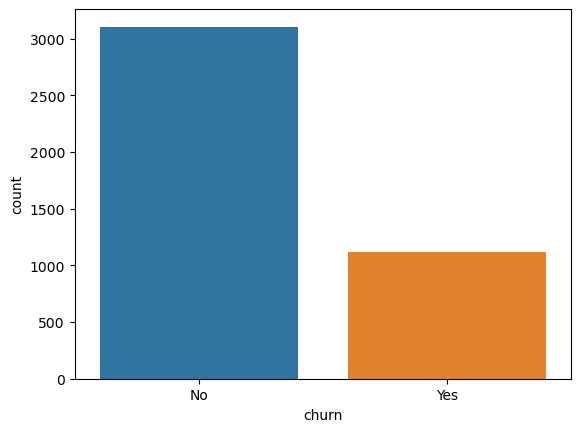

In [158]:
sns.countplot(data=train, x='churn');

In [159]:
num_col = df.select_dtypes(include='number').columns
num_col

Index(['senior_citizen', 'tenure', 'monthly_charges', 'total_charges',
       'gender_encoded', 'partner_encoded', 'dependents_encoded',
       'phone_service_encoded', 'paperless_billing_encoded', 'churn_encoded',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'online_security_No internet service', 'online_security_Yes',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No internet service', 'device_protection_Yes',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'contract_type_One year', 'contract_type_Two year',
       'internet_service_type_Fiber optic',
       'internet_service_type_No Internet Service', 'payment_types_Manual'],
      dtype='object')

senior_citizen
senior_citizen
0    5901
1    1142
Name: count, dtype: int64
senior_citizen
0    0.837853
1    0.162147
Name: proportion, dtype: float64


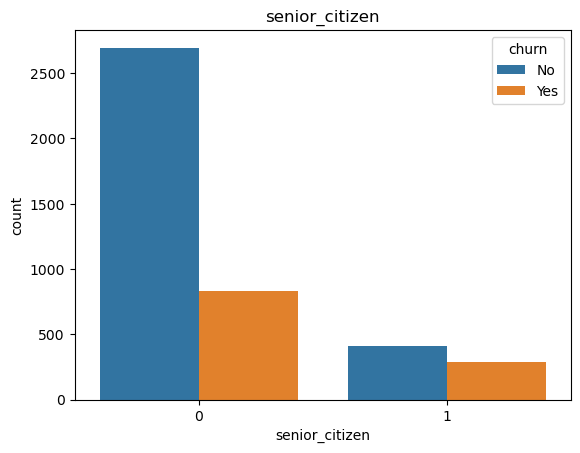

tenure
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
tenure
1     0.087037
72    0.051399
2     0.033792
3     0.028397
4     0.024989
        ...   
28    0.008093
39    0.007951
44    0.007241
36    0.007099
0     0.001562
Name: proportion, Length: 73, dtype: float64


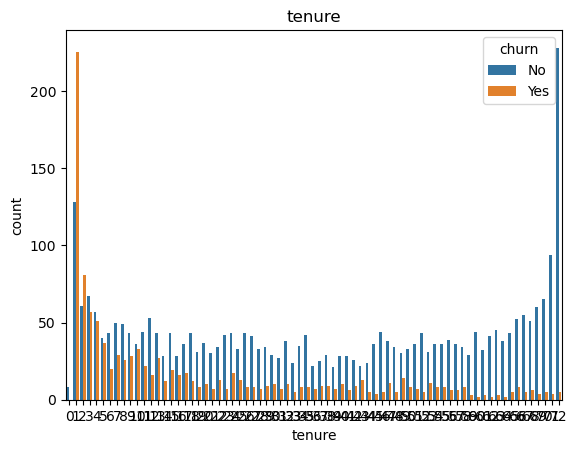

monthly_charges
monthly_charges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
116.55     1
106.85     1
68.55      1
108.80     1
67.85      1
Name: count, Length: 1585, dtype: int64
monthly_charges
20.05     0.008661
19.85     0.006389
19.95     0.006247
19.90     0.006247
20.00     0.006105
            ...   
116.55    0.000142
106.85    0.000142
68.55     0.000142
108.80    0.000142
67.85     0.000142
Name: proportion, Length: 1585, dtype: float64


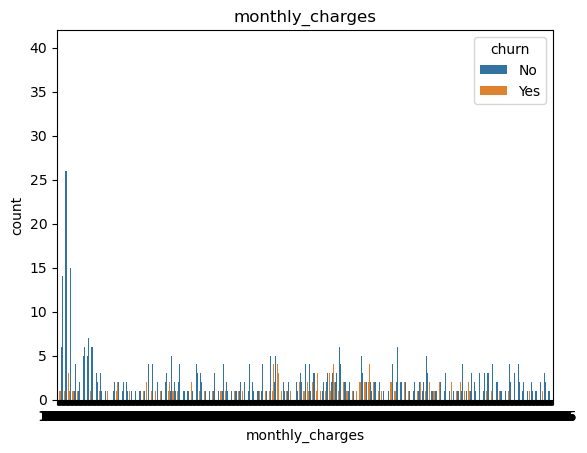

total_charges
total_charges
0.00       11
20.20      11
19.75       9
19.90       8
20.05       8
           ..
2387.75     1
6302.80     1
2058.50     1
829.55      1
3707.60     1
Name: count, Length: 6531, dtype: int64
total_charges
0.00       0.001562
20.20      0.001562
19.75      0.001278
19.90      0.001136
20.05      0.001136
             ...   
2387.75    0.000142
6302.80    0.000142
2058.50    0.000142
829.55     0.000142
3707.60    0.000142
Name: proportion, Length: 6531, dtype: float64


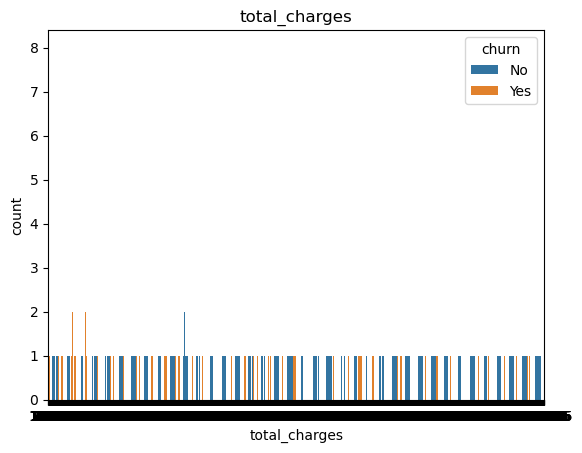

gender_encoded
gender_encoded
0    3555
1    3488
Name: count, dtype: int64
gender_encoded
0    0.504756
1    0.495244
Name: proportion, dtype: float64


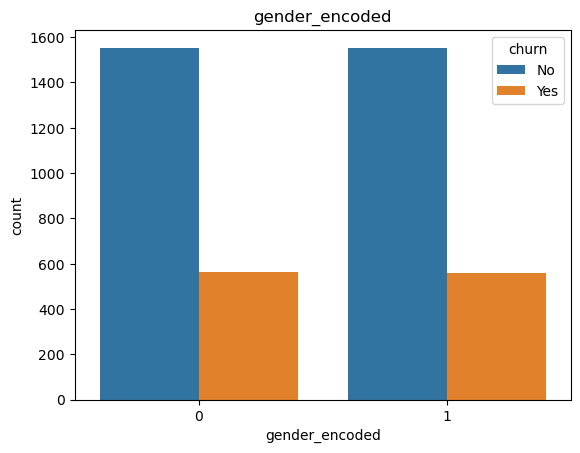

partner_encoded
partner_encoded
0    3641
1    3402
Name: count, dtype: int64
partner_encoded
0    0.516967
1    0.483033
Name: proportion, dtype: float64


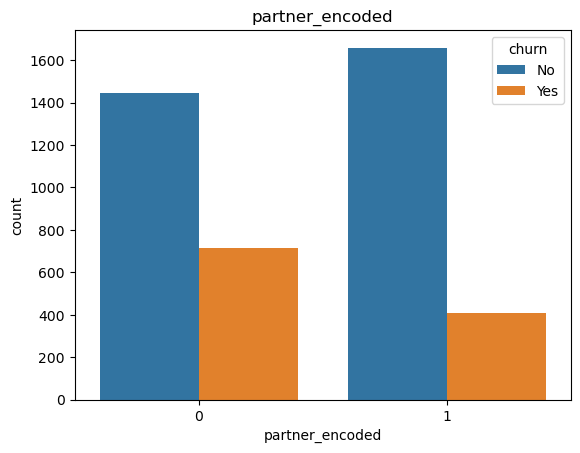

dependents_encoded
dependents_encoded
0    4933
1    2110
Name: count, dtype: int64
dependents_encoded
0    0.700412
1    0.299588
Name: proportion, dtype: float64


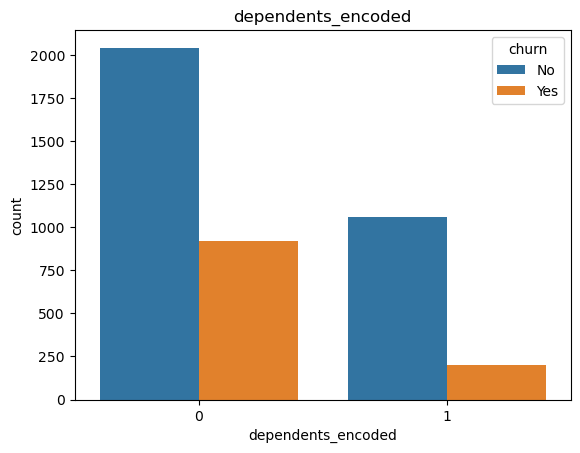

phone_service_encoded
phone_service_encoded
1    6361
0     682
Name: count, dtype: int64
phone_service_encoded
1    0.903166
0    0.096834
Name: proportion, dtype: float64


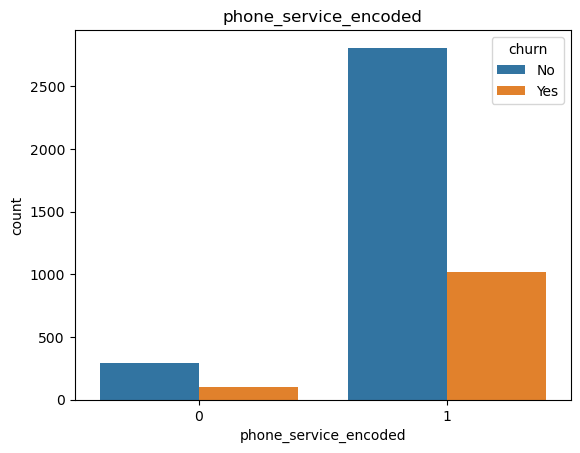

paperless_billing_encoded
paperless_billing_encoded
1    4171
0    2872
Name: count, dtype: int64
paperless_billing_encoded
1    0.592219
0    0.407781
Name: proportion, dtype: float64


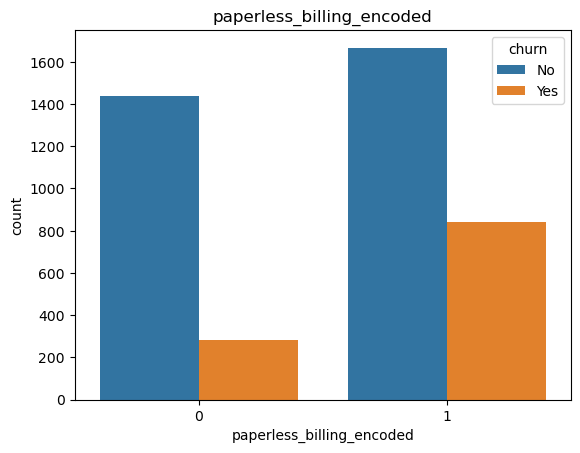

churn_encoded
churn_encoded
0    5174
1    1869
Name: count, dtype: int64
churn_encoded
0    0.73463
1    0.26537
Name: proportion, dtype: float64


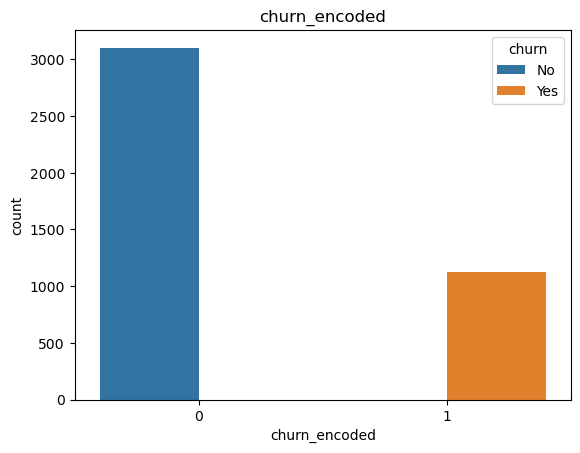

multiple_lines_No phone service
multiple_lines_No phone service
0    6361
1     682
Name: count, dtype: int64
multiple_lines_No phone service
0    0.903166
1    0.096834
Name: proportion, dtype: float64


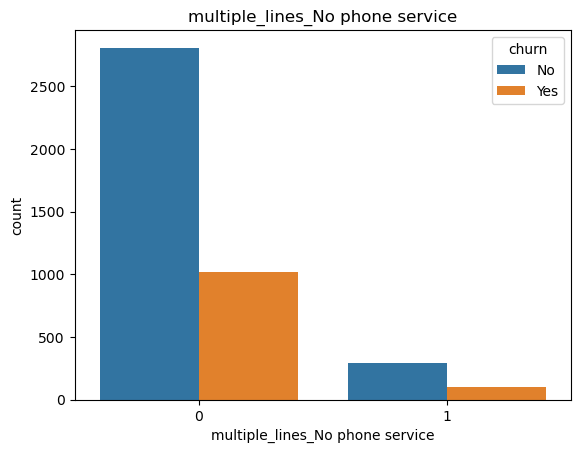

multiple_lines_Yes
multiple_lines_Yes
0    4072
1    2971
Name: count, dtype: int64
multiple_lines_Yes
0    0.578163
1    0.421837
Name: proportion, dtype: float64


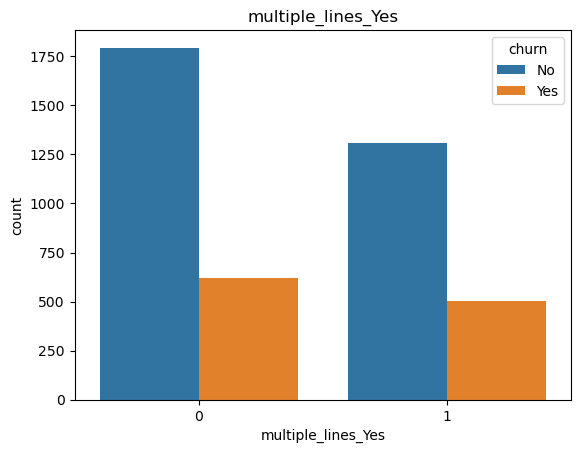

online_security_No internet service
online_security_No internet service
0    5517
1    1526
Name: count, dtype: int64
online_security_No internet service
0    0.783331
1    0.216669
Name: proportion, dtype: float64


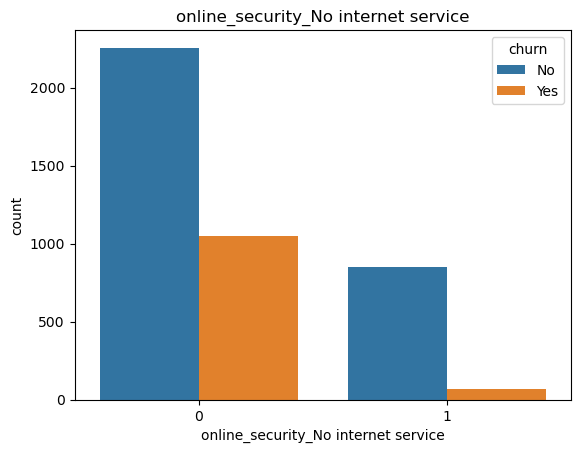

online_security_Yes
online_security_Yes
0    5024
1    2019
Name: count, dtype: int64
online_security_Yes
0    0.713332
1    0.286668
Name: proportion, dtype: float64


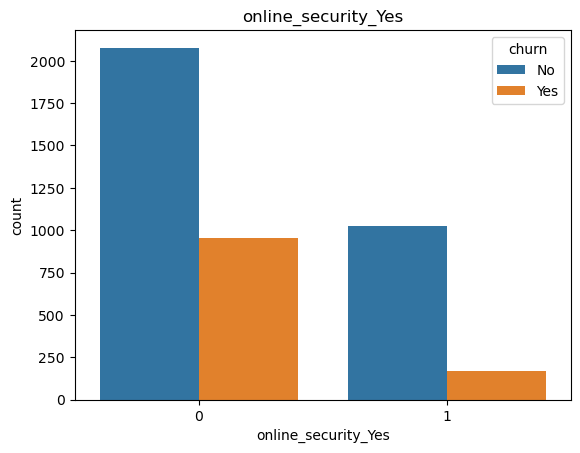

online_backup_No internet service
online_backup_No internet service
0    5517
1    1526
Name: count, dtype: int64
online_backup_No internet service
0    0.783331
1    0.216669
Name: proportion, dtype: float64


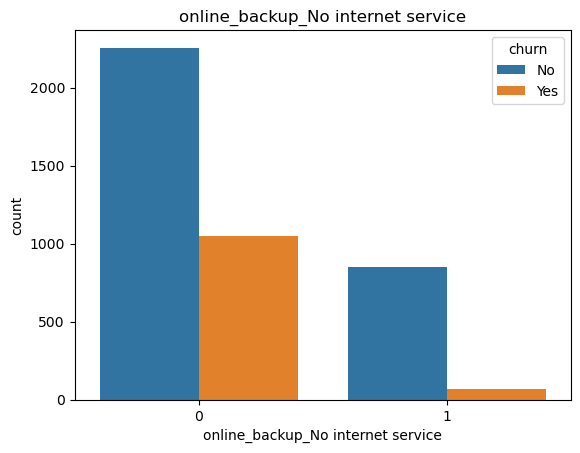

online_backup_Yes
online_backup_Yes
0    4614
1    2429
Name: count, dtype: int64
online_backup_Yes
0    0.655119
1    0.344881
Name: proportion, dtype: float64


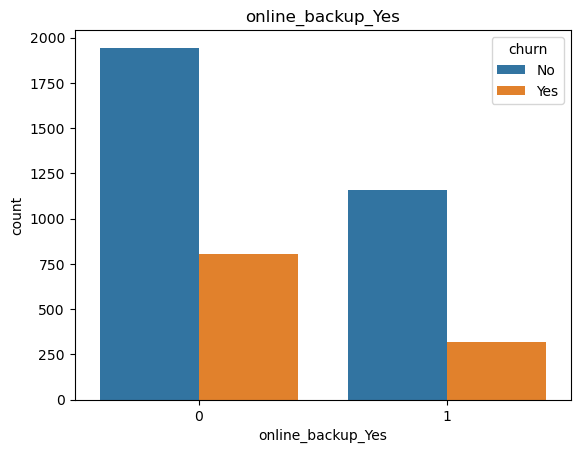

device_protection_No internet service
device_protection_No internet service
0    5517
1    1526
Name: count, dtype: int64
device_protection_No internet service
0    0.783331
1    0.216669
Name: proportion, dtype: float64


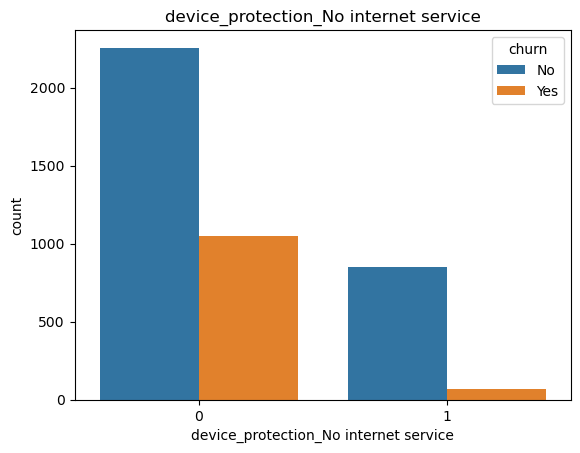

device_protection_Yes
device_protection_Yes
0    4621
1    2422
Name: count, dtype: int64
device_protection_Yes
0    0.656112
1    0.343888
Name: proportion, dtype: float64


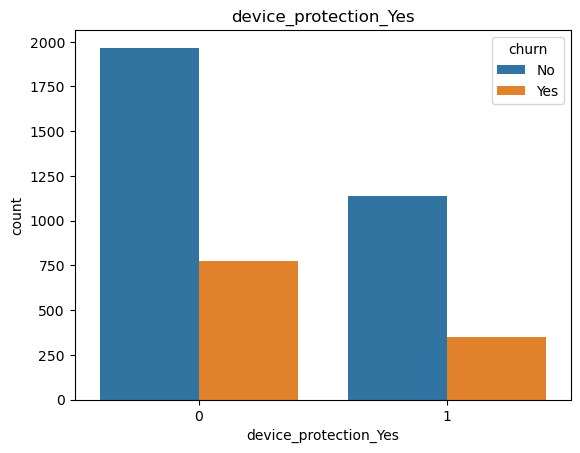

tech_support_No internet service
tech_support_No internet service
0    5517
1    1526
Name: count, dtype: int64
tech_support_No internet service
0    0.783331
1    0.216669
Name: proportion, dtype: float64


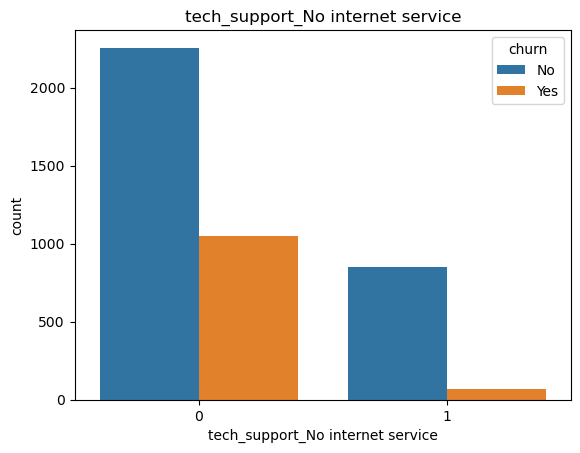

tech_support_Yes
tech_support_Yes
0    4999
1    2044
Name: count, dtype: int64
tech_support_Yes
0    0.709783
1    0.290217
Name: proportion, dtype: float64


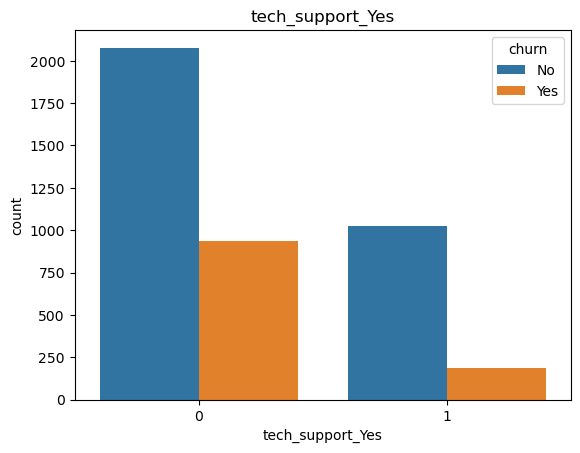

streaming_tv_No internet service
streaming_tv_No internet service
0    5517
1    1526
Name: count, dtype: int64
streaming_tv_No internet service
0    0.783331
1    0.216669
Name: proportion, dtype: float64


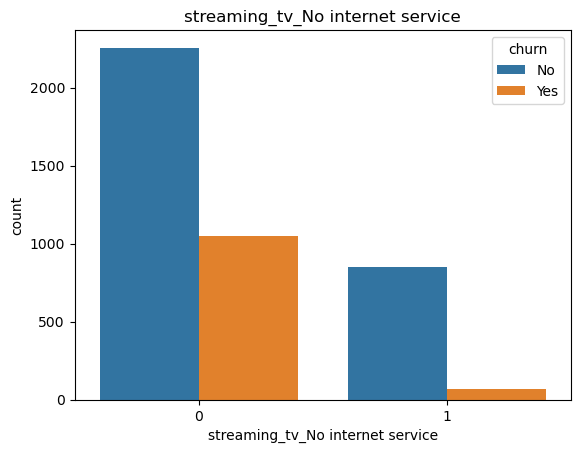

streaming_tv_Yes
streaming_tv_Yes
0    4336
1    2707
Name: count, dtype: int64
streaming_tv_Yes
0    0.615647
1    0.384353
Name: proportion, dtype: float64


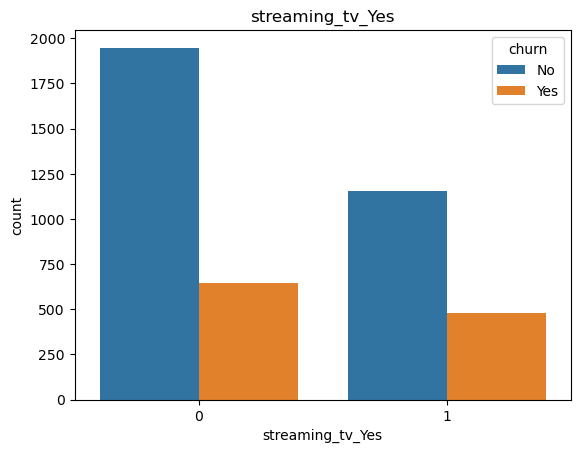

streaming_movies_No internet service
streaming_movies_No internet service
0    5517
1    1526
Name: count, dtype: int64
streaming_movies_No internet service
0    0.783331
1    0.216669
Name: proportion, dtype: float64


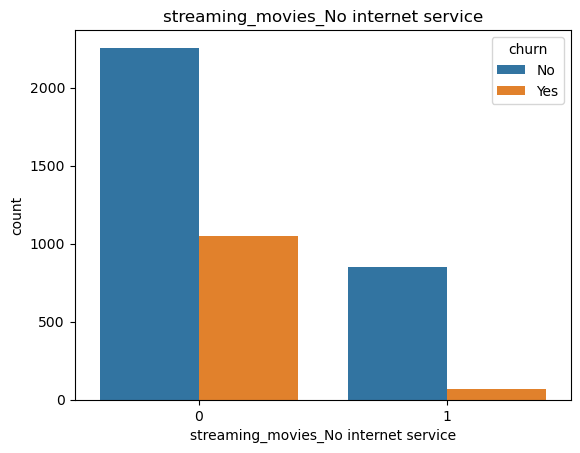

streaming_movies_Yes
streaming_movies_Yes
0    4311
1    2732
Name: count, dtype: int64
streaming_movies_Yes
0    0.612097
1    0.387903
Name: proportion, dtype: float64


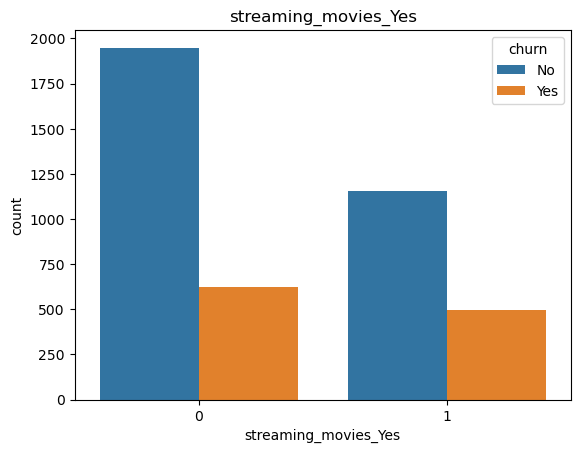

contract_type_One year
contract_type_One year
0    5570
1    1473
Name: count, dtype: int64
contract_type_One year
0    0.790856
1    0.209144
Name: proportion, dtype: float64


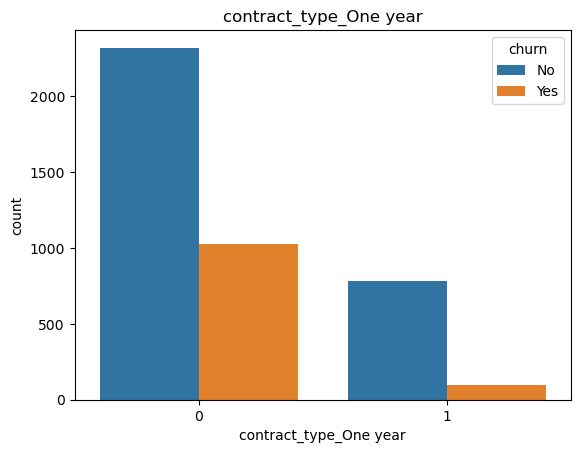

contract_type_Two year
contract_type_Two year
0    5348
1    1695
Name: count, dtype: int64
contract_type_Two year
0    0.759336
1    0.240664
Name: proportion, dtype: float64


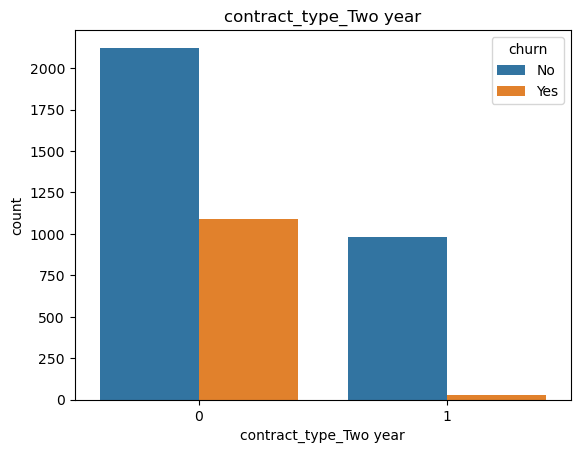

internet_service_type_Fiber optic
internet_service_type_Fiber optic
0    3947
1    3096
Name: count, dtype: int64
internet_service_type_Fiber optic
0    0.560415
1    0.439585
Name: proportion, dtype: float64


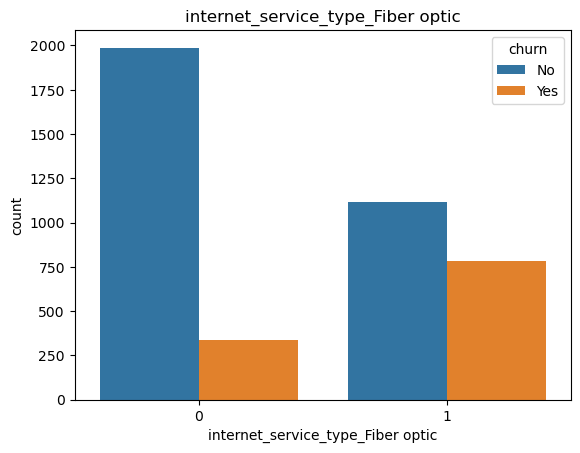

internet_service_type_No Internet Service
internet_service_type_No Internet Service
0    5517
1    1526
Name: count, dtype: int64
internet_service_type_No Internet Service
0    0.783331
1    0.216669
Name: proportion, dtype: float64


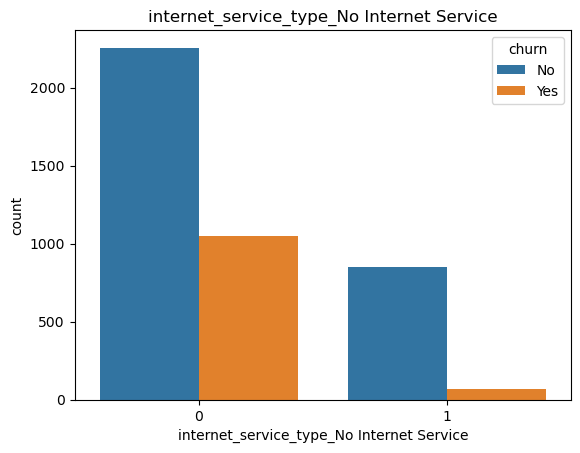

payment_types_Manual
payment_types_Manual
1    3977
0    3066
Name: count, dtype: int64
payment_types_Manual
1    0.564674
0    0.435326
Name: proportion, dtype: float64


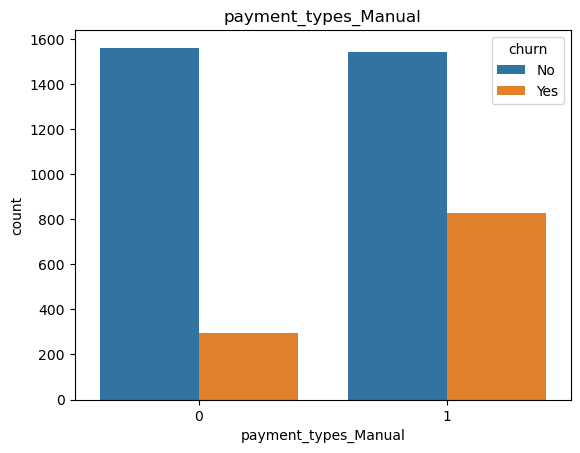

In [160]:
#using this function to view numeric variables when compared to churning or not.

for col in num_col:
    print(col)
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True)) #percentage
    sns.countplot(x=(col), hue="churn", data=train);
    plt.title(col)
    plt.show()



**Q1: Does contract type affect whether or not someone churns?**

>Hypothesize

$H_o$: There is NO relationship between contract and a customer churning.

$H_a$: There is a relationship between contract and a customer churning.

In [161]:
#setting confidence level
alpha=0.05

>Visualize

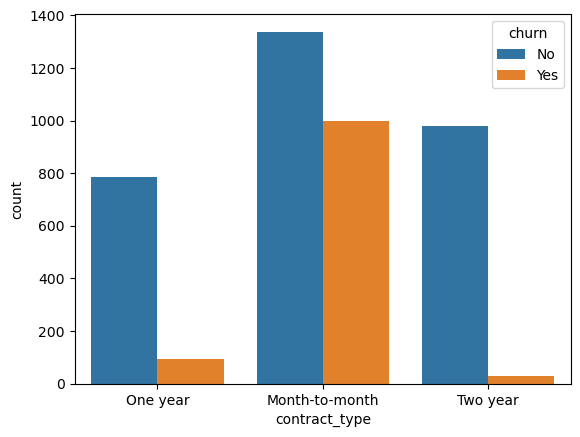

In [162]:
#countplot showing distribution of contract types comparing churn levels
sns.countplot(x="contract_type", hue="churn", data=train);

>Visually, it looks like an overwhelming majority of customers with month to month contracts are churning compared to one or two year contracts.

>Analyze

In [163]:
#creating a contingency table of observed values from the contract type and churn columns.

observed = pd.crosstab(train.churn, train.contract_type)
observed

contract_type,Month-to-month,One year,Two year
churn,,,
No,1338,785,981
Yes,997,94,30


>We will use a chi2 test because we are comparing two categorial variables and want to test for independence.

In [164]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [165]:
#setting confidence level
alpha = 0.05

In [171]:
chi2_results(observed)

Expected DataFrame
contract_type  Month-to-month  One year  Two year
churn                                            
No                       1715       645       742
Yes                       619       233       268


Observed DataFrame
contract_type  Month-to-month  One year  Two year
churn                                            
No                       1338       785       981
Yes                       997        94        30
chi^2 = 714.1745
p     = 0.0000
---



In [264]:
if p < alpha:
    print('We can reject our null hypothesis and say that there is a relationship between contract type and a customer churning')
else:
    print('We fail to reject our null hypothesis and say that there is NO relationship between contract type and a customer churning')

We can reject our null hypothesis and say that there is a relationship between contract type and a customer churning


My p-value is less than alpha, therefore, we reject the null hypothesis.

>Summarize

We can conclude that contract type does affect whether or not someone churns and it appears to be much higher with month to month contracts compared to one or two year contracts.

------------

**Q2: Are high monthly charges causing customers to churn?**

High monthly charges is defined as being higher than average monthly charges.

>Hypothesize

$H_o$: There is NO relationship between monthly charges and a customer churning.

$H_a$: There is a relationship between monthly charges and a customer churning.

In [173]:
#setting confidence level
alpha = 0.05

In [174]:
#average monthly charge for a customer that churned
train.monthly_charges[train.churn == 'Yes'].mean()

74.499955396967

In [175]:
#creating variable for average monthly charges
avg_monthly_charges = train['monthly_charges'].mean()

In [176]:
avg_monthly_charges

65.13894674556212

In [177]:
#percentage of customers who churn who pay less than average monthly charges is around 16%.
train.churn[train['monthly_charges'] < avg_monthly_charges ].value_counts(normalize=True)

churn
No     0.837073
Yes    0.162927
Name: proportion, dtype: float64

In [178]:
#percentage of customers who churn who pay higher than average monthly charges is around 35%.
train.churn[train['monthly_charges'] > avg_monthly_charges ].value_counts(normalize=True)

churn
No     0.653209
Yes    0.346791
Name: proportion, dtype: float64

In [179]:
# checking counts of customers with low monthly charges compared to chrun rate.
train.churn[train['monthly_charges'] < avg_monthly_charges ].value_counts()

churn
No     1567
Yes     305
Name: count, dtype: int64

In [180]:
# checking counts of customers with high monthly charges compared to chrun rate.
train.churn[train['monthly_charges'] > avg_monthly_charges].value_counts()

churn
No     1537
Yes     816
Name: count, dtype: int64

In [181]:
#creating variable for high monthly charges
high_monthly_charges = train.churn[train['monthly_charges'] > avg_monthly_charges]

In [182]:
#creating variable for low monthly charges
low_monthly_charges = train.churn[train['monthly_charges'] < avg_monthly_charges]

>Visualize

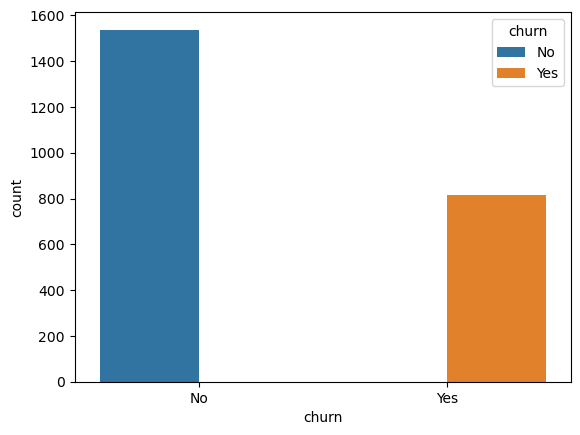

In [183]:
#nearly 35% churn with higher than average monthly payments 
sns.countplot(x=high_monthly_charges, hue="churn", data=train);

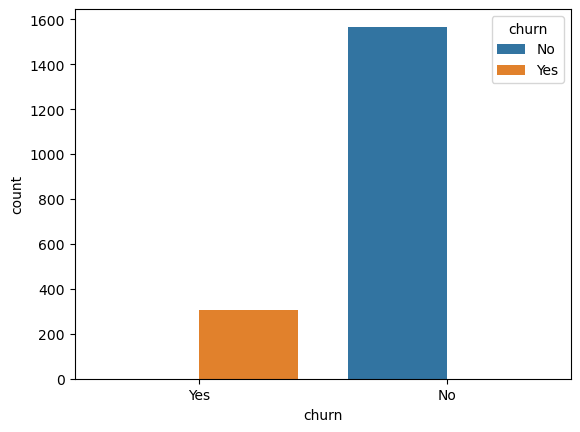

In [184]:
#only 16% churn with higher than average monthly payments 
sns.countplot(x=low_monthly_charges, hue="churn", data=train);

>Analyze

In [185]:
#comparing categorical (churned:True or False) vs continuous variable (monthly charges)
# We will use a one sample ttest comparing monthly charges of customers who churned to monthly 
# charges of all customers, which in this case represents our population.
#So we will use a one sample, two tailed ttest

#setting a variable of monthly charges of customers who churned
mc_churn = train [train.churn == 'Yes'].monthly_charges

#setting a variable of the mean of monthly charges
monthly_charges_mean = train.monthly_charges.mean()

t, p = stats.ttest_1samp(mc_churn, monthly_charges_mean)

print(f't = {t}, p = {p}, alpha = {alpha}')

t = 12.630413381380539, p = 2.7605654410224826e-34, alpha = 0.05


In [186]:
if p < alpha:
    print('We can reject our null hypothesis and say that there is a difference in means')
else:
    print('We fail to reject our null hypothesis')

We can reject our null hypothesis and say that there is a difference in means


>My p-value is less than alpha, therefore, we reject the null hypothesis.

>   We can conclude that there is a relationship between monthly charges and churning.

>Summarize

We confirmed that there is a relationship between monthly charges and churning. It appears that a customer having higher than average monthly charges may cause a customer to churn more often than customers with lower than average monthly charges.

In [187]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_No Internet Service,payment_types_Manual
2865,4083-BFNYK,Female,1,Yes,No,38,Yes,Yes,Yes,Yes,...,0,0,0,0,1,1,0,1,0,0
4107,5804-LEPIM,Female,1,No,No,2,Yes,No,No,No,...,0,0,0,0,0,0,0,1,0,1
3453,4895-TMWIR,Male,1,Yes,No,11,Yes,No,No internet service,No internet service,...,0,1,0,1,0,0,0,0,1,1
923,1342-JPNKI,Male,0,No,No,10,Yes,Yes,No,No,...,0,0,1,0,0,0,0,1,0,0
2370,3397-AVTKU,Male,0,No,No,43,Yes,No,No,Yes,...,0,0,0,0,1,0,1,0,0,1


In [188]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4225 entries, 2865 to 5354
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   customer_id                                4225 non-null   object 
 1   gender                                     4225 non-null   object 
 2   senior_citizen                             4225 non-null   int64  
 3   partner                                    4225 non-null   object 
 4   dependents                                 4225 non-null   object 
 5   tenure                                     4225 non-null   int64  
 6   phone_service                              4225 non-null   object 
 7   multiple_lines                             4225 non-null   object 
 8   online_security                            4225 non-null   object 
 9   online_backup                              4225 non-null   object 
 10  device_protection         

 **Q3: Is a customer having fiber optic internet related to a customer churning?**
 
 

>Hypothesize

$H_o$: There is NO association between a customer having fiber optic internet and them churning.
 
 $H_a$: There IS an association between a customer having fiber optic internet and them churning.

In [189]:
#setting confidence level
alpha = 0.05

>Visualize

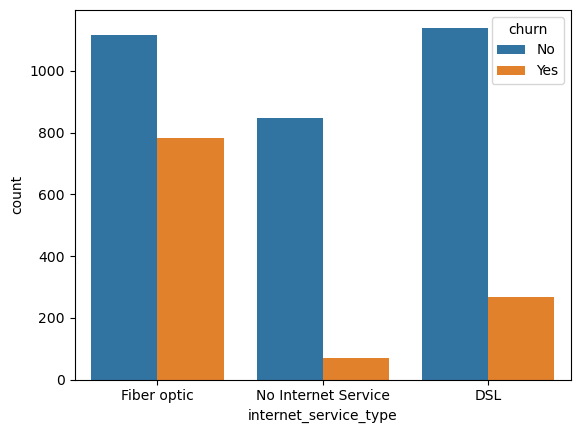

In [190]:
#plot showing distribution of internet service types which show fiber optic with a much higher churn rate than DSL.
sns.countplot(x="internet_service_type", hue="churn", data=train);

In [191]:
train['internet_service_type_Fiber optic'].value_counts()

internet_service_type_Fiber optic
0    2327
1    1898
Name: count, dtype: int64

In [192]:
#41% of customers with Fiber optic internet are churning
train.churn[train['internet_service_type_Fiber optic'] == 1].value_counts(normalize=True)

churn
No     0.587987
Yes    0.412013
Name: proportion, dtype: float64

In [193]:
train.churn[train['internet_service_type_Fiber optic'] == 1].value_counts()

churn
No     1116
Yes     782
Name: count, dtype: int64

>Analyze

>We will use a chi2 test because we are comparing two categorial variables and want to test for independence.

In [194]:
#creating a contingency table of observed values from the fiber optic internet and churn columns.
observed = pd.crosstab(train.churn, train['internet_service_type_Fiber optic'])
observed

internet_service_type_Fiber optic,0,1
churn,,
No,1988,1116
Yes,339,782


In [195]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [196]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[1988 1116]
 [ 339  782]]

Expected
[[1709 1394]
 [ 617  503]]

----
chi^2 = 379.0319
p     = 0.0000


In [197]:
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

reject the null hypothesis


There IS an association between a customer having fiber optic internet and them churning.

**Q4: Is a customer having manual payments related to a customer churning?**
 


>Hypothesize

$H_o$: There is NO association between a payment types and the customer churning.
 
$H_a$: There IS an association between a payment types and the customer churning.

In [198]:
#setting confidence level
alpha=0.05

>Visualize

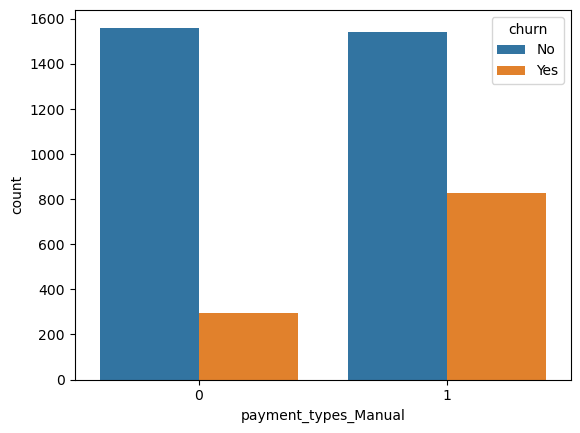

In [199]:
#plot showing distribution of payment types which show manual payments with a much higher 
#churn rate than automatic payments.
sns.countplot(x="payment_types_Manual", hue="churn", data=train);

In [200]:
#checking payment types value counts
train['payment_types_Manual'].value_counts()

payment_types_Manual
1    2369
0    1856
Name: count, dtype: int64

In [201]:
#checking value counts for manual payment types comparing churned or not
train.churn[train['payment_types_Manual'] == 1].value_counts()

churn
No     1543
Yes     826
Name: count, dtype: int64

In [202]:
#checking value counts for automatic payment types comparing churned or not
train.churn[train['payment_types_Manual'] == 0].value_counts()

churn
No     1561
Yes     295
Name: count, dtype: int64

In [203]:
#checking percentages for manual payment types comparing churned or not
train.churn[train['payment_types_Manual'] == 1].value_counts(normalize=True)

churn
No     0.65133
Yes    0.34867
Name: proportion, dtype: float64

In [204]:
#checking percentages for automatic payment types comparing churned or not
train.churn[train['payment_types_Manual'] == 0].value_counts(normalize=True)

churn
No     0.841056
Yes    0.158944
Name: proportion, dtype: float64

>Analyze

>We will use a chi2 test because we are comparing two categorial variables and want to test for independence.

In [205]:
#creating a contingency table of observed values from the payment types and churn columns.
observed = pd.crosstab(train.churn, train['payment_types_Manual'])
observed

payment_types_Manual,0,1
churn,,
No,1561,1543
Yes,295,826


In [206]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [207]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[1561 1543]
 [ 295  826]]

Expected
[[1363 1740]
 [ 492  628]]

----
chi^2 = 191.2033
p     = 0.0000


In [208]:
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

reject the null hypothesis


There IS an association between a payment types and the customer churning.

>Summarize

We can conclude that a customer having manual payment type is more likely to churn than a customer with automatic payments.

>MODELING

In [209]:
#creating variable of a list of variables that I will be using for modeling that will 
#help with the 4 questions asked.

for_model = ['monthly_charges', 'contract_type_One year', 'contract_type_Two year',
       'internet_service_type_Fiber optic',
       'internet_service_type_No Internet Service',
       'payment_types_Manual']

In [210]:
#setting data for models for train, validate, and test
X_train = train[for_model]
X_validate = validate[for_model]
X_test = test[for_model]

In [211]:
#setting target variable for models for train, validate, and test
y_train = train.churn
y_validate = validate.churn
y_test = test.churn

In [212]:
train.churn.value_counts()

churn
No     3104
Yes    1121
Name: count, dtype: int64

In [213]:
train.churn.mode()

0    No
Name: churn, dtype: object

In [214]:
(train.churn == 'No').mean()

0.7346745562130178

>My baseline prediction is 'No' (not churned) which is what would happen if we predicted not churned every time and the accuracy is 73%

In [215]:
#creating the object
tree = DecisionTreeClassifier()
tree

DecisionTreeClassifier()

In [216]:
#fitting the model

tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [217]:
#making predictions
y_pred = tree.predict(X_train)
y_pred[:10]

array(['No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No'],
      dtype=object)

In [218]:
#function to estimate the probability of each outcome, using the training data
y_pred_proba = tree.predict_proba(X_train)

In [219]:
#created function to combine data strength information since it is used multiple times.

def model_strength(y_train, y_pred):    
    
    print(classification_report(y_train, y_pred))

    counts = pd.crosstab(y_train, y_pred)

    TP = counts.iloc[1,1]
    TN = counts.iloc[0,0]
    FP = counts.iloc[0,1]
    FN = counts.iloc[1,0]

    print(f'TP = {TP}')
    print(f'TN = {TN}')
    print(f'FP = {FP}')
    print(f'FN = {FN}')

    print(' ')

    all = (TP + TN + FP + FN)
    print(f'Total = {all}')

    print(' ')

    accuracy = (TP + TN) / all
    print(f'Accuracy = {accuracy}')

    TPR = recall = TP / (TP + FN)
    FPR = FP / (FP + TN)

    TNR = TN / (FP + TN)
    FNR = FN / (FN + TP)
    
    
    precision =  TP / (TP + FP)
    f1 =  2 * ((precision * recall) / ( precision + recall))
    print(f'Precision= {precision}')
    print(f'f1={f1}')

    print(' ')

    support_pos = TP + FN
    support_neg = FP + TN
    print(f'Support (Yes)= {support_pos}')
    print(f'Support (No)= {support_neg}')

    print(' ')
 
    print(f'True Positive Rate={TPR}')
    print(f'False Positive Rate={FPR}')
    print(f'True Negative Rate={TNR}')
    print(f'False Negative Rate={FNR}')

In [220]:
model_strength(y_train, y_pred)

              precision    recall  f1-score   support

          No       0.91      0.98      0.94      3104
         Yes       0.92      0.74      0.82      1121

    accuracy                           0.91      4225
   macro avg       0.91      0.86      0.88      4225
weighted avg       0.91      0.91      0.91      4225

TP = 824
TN = 3031
FP = 73
FN = 297
 
Total = 4225
 
Accuracy = 0.9124260355029585
Precision= 0.9186176142697882
f1=0.8166501486620416
 
Support (Yes)= 1121
Support (No)= 3104
 
True Positive Rate=0.7350579839429081
False Positive Rate=0.023518041237113402
True Negative Rate=0.9764819587628866
False Negative Rate=0.2649420160570919


In [221]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree.score(X_train, y_train)))


Accuracy of Decision Tree classifier on training set: 0.91


In [222]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(tree.score(X_validate, y_validate)))



Accuracy of Decision Tree classifier on validate set: 0.72


In [223]:
stats = []
for x in range(1,35):
    #create the object
    tree = DecisionTreeClassifier(max_depth=x)
    
    #fit the object
    tree.fit(X_train, y_train) 
    
    #calculate the accuracy of train and validate
    acc = tree.score(X_train, y_train)
    val_acc = tree.score(X_validate, y_validate)
    stats.append([x, round(acc,2),round(val_acc,2) ])

stats_df = pd.DataFrame(stats, columns =['max_depth','train_acc','val_acc'])
stats_df.head()

,max_depth,train_acc,val_acc
0,1,0.73,0.73
1,2,0.73,0.73
2,3,0.76,0.76
3,4,0.77,0.77
4,5,0.78,0.77


In [224]:
#function to test multiple max depths to determine the best model

for x in range(1,35):
    #create the object
    tree = DecisionTreeClassifier(max_depth=x)
    
    #fit the object
    tree.fit(X_train, y_train) 
    
    #calculate the accuracy of train and validate
    acc = tree.score(X_train, y_train)
    val_acc = tree.score(X_validate, y_validate)
     
    print(f'with a max depth of {x}, the accuracy is {round(acc,2)}, validate accuracy is {round(val_acc,2)} ')

with a max depth of 1, the accuracy is 0.73, validate accuracy is 0.73 
with a max depth of 2, the accuracy is 0.73, validate accuracy is 0.73 
with a max depth of 3, the accuracy is 0.76, validate accuracy is 0.76 
with a max depth of 4, the accuracy is 0.77, validate accuracy is 0.77 
with a max depth of 5, the accuracy is 0.78, validate accuracy is 0.77 
with a max depth of 6, the accuracy is 0.78, validate accuracy is 0.76 
with a max depth of 7, the accuracy is 0.79, validate accuracy is 0.76 
with a max depth of 8, the accuracy is 0.79, validate accuracy is 0.76 
with a max depth of 9, the accuracy is 0.8, validate accuracy is 0.77 
with a max depth of 10, the accuracy is 0.8, validate accuracy is 0.77 
with a max depth of 11, the accuracy is 0.82, validate accuracy is 0.76 
with a max depth of 12, the accuracy is 0.82, validate accuracy is 0.75 
with a max depth of 13, the accuracy is 0.84, validate accuracy is 0.75 
with a max depth of 14, the accuracy is 0.85, validate accurac

>model with max depth of 10 is best based on validate and test scores

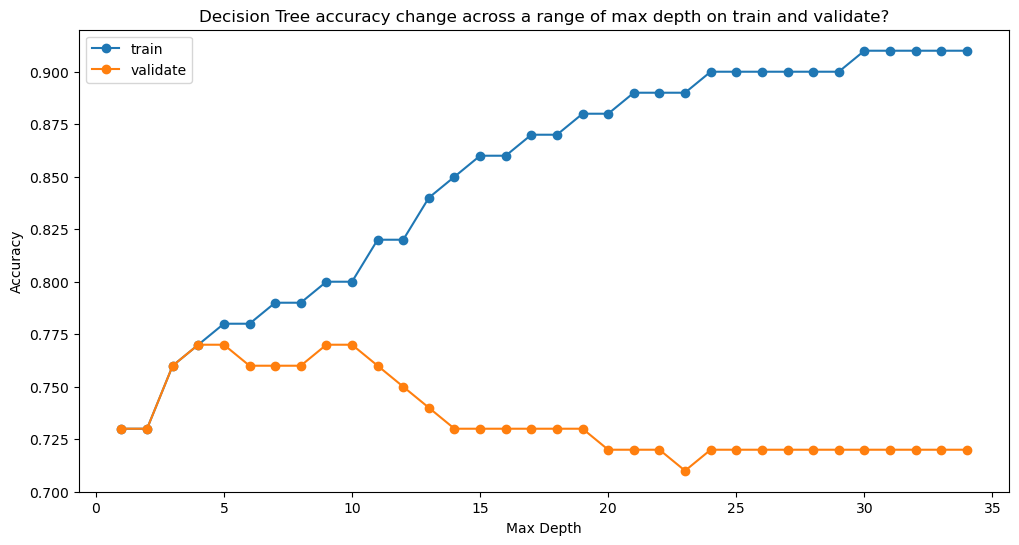

In [225]:
plt.figure(figsize=(12,6))
plt.plot(stats_df.max_depth, stats_df.train_acc, label='train', marker='o')
plt.plot(stats_df.max_depth, stats_df.val_acc, label='validate', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree accuracy change across a range of max depth on train and validate?')
plt.legend()
plt.show()

In [226]:
#creating best fitting model with max depth of 10 to test other model data
tree1 = DecisionTreeClassifier(max_depth=10)

In [227]:
#fitting model
tree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [228]:
y_pred1 = tree1.predict(X_train)

In [229]:
model_strength(y_train, y_pred1)

              precision    recall  f1-score   support

          No       0.87      0.87      0.87      3104
         Yes       0.63      0.63      0.63      1121

    accuracy                           0.80      4225
   macro avg       0.75      0.75      0.75      4225
weighted avg       0.80      0.80      0.80      4225

TP = 701
TN = 2700
FP = 404
FN = 420
 
Total = 4225
 
Accuracy = 0.8049704142011834
Precision= 0.6343891402714932
f1=0.6298292902066487
 
Support (Yes)= 1121
Support (No)= 3104
 
True Positive Rate=0.6253345227475469
False Positive Rate=0.13015463917525774
True Negative Rate=0.8698453608247423
False Negative Rate=0.3746654772524532


In [230]:
print(tree1.score(X_train, y_train))
print(tree1.score(X_validate, y_validate))

0.8049704142011834
0.7679205110007097


In [231]:
#creating the object for a random forest classifier
rf = RandomForestClassifier(min_samples_leaf=1, max_depth=10, random_state=123)

In [232]:
#fitting the model
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [233]:
#making predictions
y_pred = rf.predict(X_train)
y_pred[:10]

array(['No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes'],
      dtype=object)

In [234]:
rf.score(X_train, y_train)

0.8191715976331361

In [235]:
pd.crosstab(y_train, y_pred)

col_0,No,Yes
churn,,
No,2792,312
Yes,452,669


In [236]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

          No       0.86      0.90      0.88      3104
         Yes       0.68      0.60      0.64      1121

    accuracy                           0.82      4225
   macro avg       0.77      0.75      0.76      4225
weighted avg       0.81      0.82      0.82      4225



In [237]:
#function to test multiple max depths to determine the best model
for x in range(1,11):
    #create the object
    rf = RandomForestClassifier(min_samples_leaf=x, max_depth=11-x, random_state=123)

    #fit the object
    rf.fit(X_train, y_train)

    #create prediction variable
    y_pred = rf.predict(X_train)

    #calculate the accuracy of train and validate
    acc = rf.score(X_train, y_train)
    val_acc = rf.score(X_validate, y_validate)
    
    print(f'for min leaf samples = {x} and max depth = {11-x}, the train accuracy is {round(acc,2)}, validate accuracy is {round(val_acc,2)}')

for min leaf samples = 1 and max depth = 10, the train accuracy is 0.82, validate accuracy is 0.76
for min leaf samples = 2 and max depth = 9, the train accuracy is 0.8, validate accuracy is 0.76
for min leaf samples = 3 and max depth = 8, the train accuracy is 0.79, validate accuracy is 0.77
for min leaf samples = 4 and max depth = 7, the train accuracy is 0.79, validate accuracy is 0.77
for min leaf samples = 5 and max depth = 6, the train accuracy is 0.78, validate accuracy is 0.77
for min leaf samples = 6 and max depth = 5, the train accuracy is 0.78, validate accuracy is 0.77
for min leaf samples = 7 and max depth = 4, the train accuracy is 0.78, validate accuracy is 0.77
for min leaf samples = 8 and max depth = 3, the train accuracy is 0.76, validate accuracy is 0.76
for min leaf samples = 9 and max depth = 2, the train accuracy is 0.73, validate accuracy is 0.73
for min leaf samples = 10 and max depth = 1, the train accuracy is 0.73, validate accuracy is 0.73


>Best model is one with 3 min leaf samples and max depth of 8 with train accuracy of 0.79 and
validate accuracy of 0.77.

In [238]:
rf1 = RandomForestClassifier(min_samples_leaf=3, max_depth=8, random_state=123)

In [239]:
rf1.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=3, random_state=123)

In [240]:
y_pred1 = rf1.predict(X_train)

In [241]:
model_strength(y_train, y_pred1)

              precision    recall  f1-score   support

          No       0.84      0.88      0.86      3104
         Yes       0.62      0.54      0.58      1121

    accuracy                           0.79      4225
   macro avg       0.73      0.71      0.72      4225
weighted avg       0.78      0.79      0.79      4225

TP = 609
TN = 2732
FP = 372
FN = 512
 
Total = 4225
 
Accuracy = 0.7907692307692308
Precision= 0.6207951070336392
f1=0.5794481446241675
 
Support (Yes)= 1121
Support (No)= 3104
 
True Positive Rate=0.5432649420160571
False Positive Rate=0.11984536082474227
True Negative Rate=0.8801546391752577
False Negative Rate=0.4567350579839429


In [242]:
print(rf1.score(X_train, y_train))
print(rf1.score(X_validate, y_validate))

0.7907692307692308
0.7672107877927609


In [243]:
stats = []

for x in range(1,11):
    rf = RandomForestClassifier(min_samples_leaf=x, max_depth=11-x, random_state=123)

    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_train)

    acc = rf.score(X_train, y_train)
    acc_val = rf.score(X_validate, y_validate)
    
    stats.append([x, 11-x,round(acc,2),round(acc_val,2) ]) 

In [244]:
stats_df = pd.DataFrame(stats, columns =['min_leaf','max_depth','train_acc','acc_val'])
stats_df

,min_leaf,max_depth,train_acc,acc_val
0,1,10,0.82,0.76
1,2,9,0.80,0.76
2,3,8,0.79,0.77
3,4,7,0.79,0.77
4,5,6,0.78,0.77
5,6,5,0.78,0.77
6,7,4,0.78,0.77
7,8,3,0.76,0.76
8,9,2,0.73,0.73
9,10,1,0.73,0.73


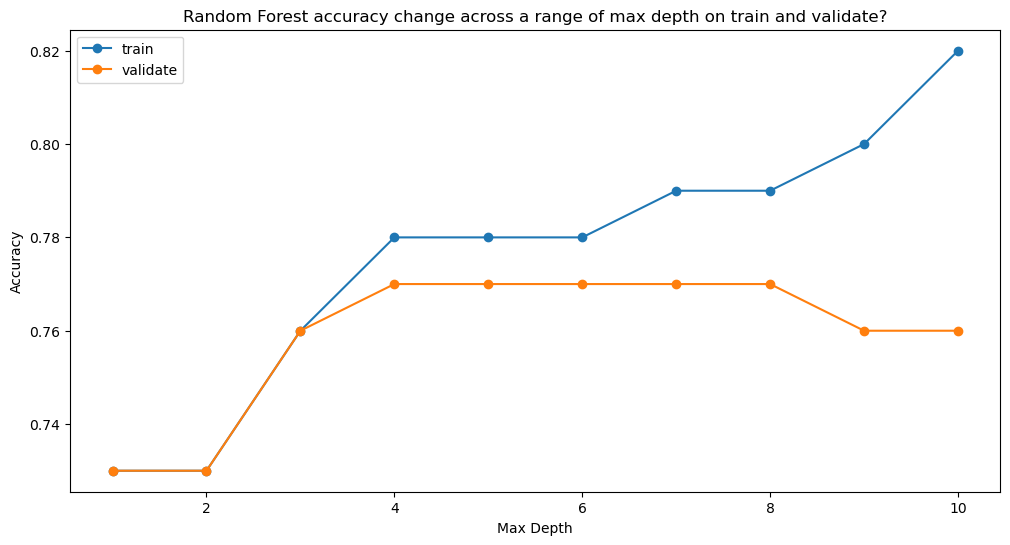

In [248]:
plt.figure(figsize=(12,6))
plt.plot(stats_df.max_depth, stats_df.train_acc, label='train', marker='o')
plt.plot(stats_df.max_depth, stats_df.acc_val, label='validate', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Random Forest accuracy change across a range of max depth on train and validate?')
plt.legend()
plt.show()

In [249]:
#creating and fitting the knn model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [250]:
#setting y_pred for knn model

y_pred = knn.predict(X_train)
y_pred[:10]

array(['No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No'],
      dtype=object)

In [251]:
#checking knn model strength stats
model_strength(y_train, y_pred)

              precision    recall  f1-score   support

          No       0.86      0.90      0.88      3104
         Yes       0.68      0.60      0.64      1121

    accuracy                           0.82      4225
   macro avg       0.77      0.75      0.76      4225
weighted avg       0.81      0.82      0.81      4225

TP = 675
TN = 2782
FP = 322
FN = 446
 
Total = 4225
 
Accuracy = 0.8182248520710059
Precision= 0.6770310932798396
f1=0.6373937677053824
 
Support (Yes)= 1121
Support (No)= 3104
 
True Positive Rate=0.6021409455842998
False Positive Rate=0.10373711340206186
True Negative Rate=0.8962628865979382
False Negative Rate=0.39785905441570024


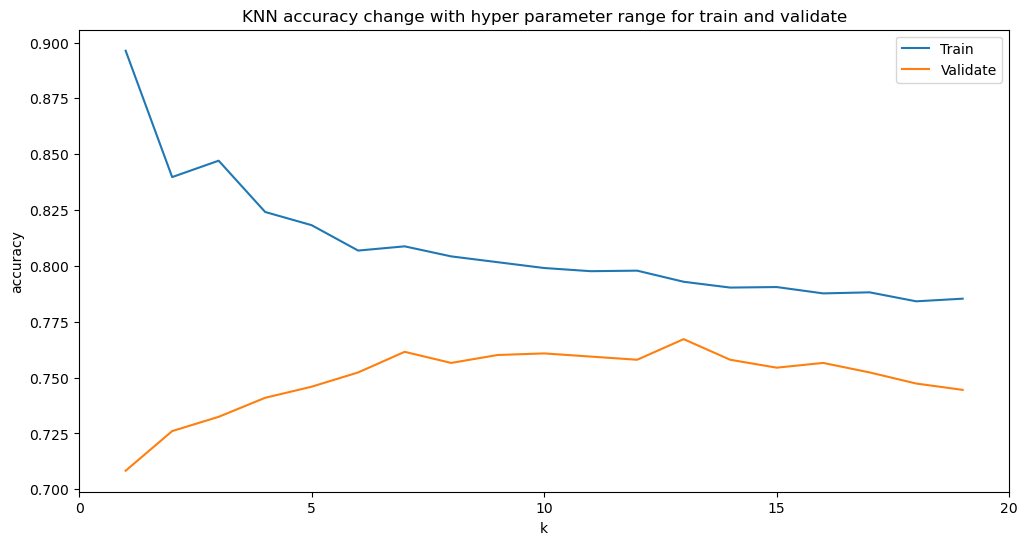

In [252]:
k_range = range(1, 20)
train_scores = []
validate_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k, weights='uniform')
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    validate_scores.append(knn.score(X_validate, y_validate))
plt.figure(figsize=(12,6))
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('KNN accuracy change with hyper parameter range for train and validate')
plt.plot(k_range, train_scores, label='Train')
plt.plot(k_range, validate_scores, label='Validate')
plt.legend()
plt.xticks([0,5,10,15,20])
plt.show()

>Comparing my best models for decision tree, random forest, and knn based on training and validate scores

In [253]:
#printing decision tree model train and validate scores

print(f'decision tree training score = {round(tree1.score(X_train, y_train),2)}')
print(f'decision tree validate score = {round(tree1.score(X_validate, y_validate),2)}')

decision tree training score = 0.8
decision tree validate score = 0.77


In [254]:
#printing random forest model train and validate scores

print(f'random forest training score = {round(rf1.score(X_train, y_train),2)}')
print(f'random forest validate score = {round(rf1.score(X_validate, y_validate),2)}')

random forest training score = 0.79
random forest validate score = 0.77


In [255]:
#printing knn model train and validate scores

print(f'knn training score = {round(knn.score(X_train, y_train),2)}')
print(f'knn validate score = {round(knn.score(X_validate, y_validate),2)}')

knn training score = 0.79
knn validate score = 0.74


>Test

In [256]:
#printing my knn score with test data set

print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of KNN classifier on test set: 0.76


In [257]:
#printing my decision tree score with test data set

print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(tree1.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.74


In [258]:
#printing my random forest score with test data set

print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rf1.score(X_test, y_test)))

Accuracy of Random Forest classifier on test set: 0.76


>After running the test data set, the accuracy for the KNN model dropped from .82 to .74 so this means the model overfit the data. The random forest has the highest accuracy score (0.76) so it is now selected as the final model..

In [259]:
train.index

Index([2865, 4107, 3453,  923, 2370,  713, 2941,  935,  302,  869,
       ...
       4223, 4896, 6642,  416,  215, 1286, 4999, 6892, 3718, 5354],
      dtype='int64', length=4225)

In [260]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_No Internet Service,payment_types_Manual
2865,4083-BFNYK,Female,1,Yes,No,38,Yes,Yes,Yes,Yes,...,0,0,0,0,1,1,0,1,0,0
4107,5804-LEPIM,Female,1,No,No,2,Yes,No,No,No,...,0,0,0,0,0,0,0,1,0,1
3453,4895-TMWIR,Male,1,Yes,No,11,Yes,No,No internet service,No internet service,...,0,1,0,1,0,0,0,0,1,1
923,1342-JPNKI,Male,0,No,No,10,Yes,Yes,No,No,...,0,0,1,0,0,0,0,1,0,0
2370,3397-AVTKU,Male,0,No,No,43,Yes,No,No,Yes,...,0,0,0,0,1,0,1,0,0,1


In [261]:
#Creating probability of churning compared to actually churning dataframe

#creating dataframes for predictions
df_y_pred = pd.DataFrame(y_pred1).set_index(X_train.index)
df_y_pred_proba = pd.DataFrame(y_pred_proba).set_index(X_train.index)
df_id = train.customer_id

#merging dfs
df_pred = pd.merge(df_y_pred_proba, df_y_pred, left_index=True, right_index=True)
df_pred = pd.merge(df_id, df_pred, left_index=True, right_index=True)

#drop proability of not churning column
df_pred = df_pred.drop(columns=['0_x'])

#renaming columns
df_pred.rename(columns = {1:'Probability of Churning','0_y':'Churn'}, inplace=True)

In [262]:
df_pred

,customer_id,Probability of Churning,Churn
2865,4083-BFNYK,0.000,No
4107,5804-LEPIM,0.250,Yes
3453,4895-TMWIR,0.125,No
923,1342-JPNKI,0.500,No
2370,3397-AVTKU,0.000,No
...,...,...,...
1286,1915-IOFGU,0.500,Yes
4999,7025-WCBNE,0.000,No
6892,9788-HNGUT,0.000,No
3718,5229-PRWKT,0.500,Yes


In [263]:
df_pred.to_csv('predictions.csv', index=False)